In [1]:
import pandas as pd
from pathlib import Path
import numpy as np

In [2]:
file_path = Path("/Users/vivekvijay/Downloads/machine_temp_failure_missing.csv")
df = pd.read_csv(file_path)
df

,timestamp,value
0,02-12-2013 21:15,73.967322
1,02-12-2013 21:20,74.935882
2,02-12-2013 21:25,76.124162
3,02-12-2013 21:30,78.140707
4,02-12-2013 21:35,79.329836
...,...,...
22690,19-02-2014 15:05,98.185415
22691,19-02-2014 15:10,97.804168
22692,19-02-2014 15:15,97.135468
22693,19-02-2014 15:20,98.056852


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22695 entries, 0 to 22694
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  22695 non-null  object 
 1   value      21410 non-null  float64
dtypes: float64(1), object(1)
memory usage: 354.7+ KB


In [4]:
df.describe()

,value
count,21410.000000
mean,85.968188
std,13.553070
min,2.084721
25%,83.082867
50%,89.251290
75%,93.910748
max,108.510543


In [5]:
df.rename(columns={"value": "temperature"},inplace = True)
df

,timestamp,temperature
0,02-12-2013 21:15,73.967322
1,02-12-2013 21:20,74.935882
2,02-12-2013 21:25,76.124162
3,02-12-2013 21:30,78.140707
4,02-12-2013 21:35,79.329836
...,...,...
22690,19-02-2014 15:05,98.185415
22691,19-02-2014 15:10,97.804168
22692,19-02-2014 15:15,97.135468
22693,19-02-2014 15:20,98.056852


In [6]:
print(df.columns)

Index(['timestamp', 'temperature'], dtype='object')


In [7]:
df['delta_temperature'] = df['temperature'].shift(-1) - df['temperature']
df = df[:-1]
df

,timestamp,temperature,delta_temperature
0,02-12-2013 21:15,73.967322,0.968560
1,02-12-2013 21:20,74.935882,1.188280
2,02-12-2013 21:25,76.124162,2.016546
3,02-12-2013 21:30,78.140707,1.189128
4,02-12-2013 21:35,79.329836,-0.619417
...,...,...,...
22689,19-02-2014 15:00,NaN,NaN
22690,19-02-2014 15:05,98.185415,-0.381246
22691,19-02-2014 15:10,97.804168,-0.668700
22692,19-02-2014 15:15,97.135468,0.921384


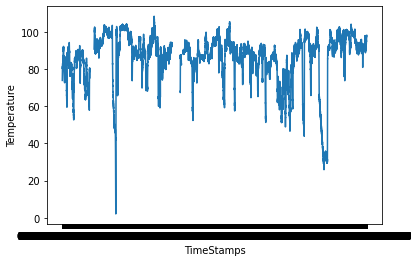

In [8]:
import matplotlib.pyplot as plt

x = df['timestamp']
y = df['temperature']
plt.plot(x, y)

plt.xlabel("TimeStamps")
plt.ylabel("Temperature")

plt.show()

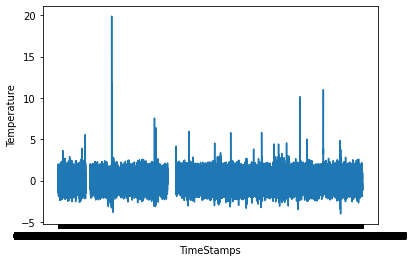

In [9]:
import matplotlib.pyplot as plt

x = df['timestamp']
y = df['delta_temperature']
plt.plot(x, y)

plt.xlabel("TimeStamps")
plt.ylabel("Temperature")

plt.show()

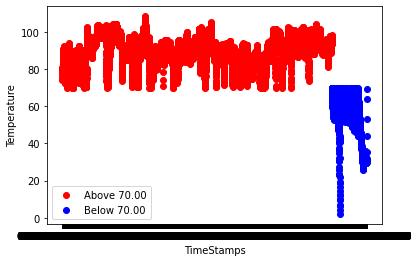

In [10]:
above_threshold = df[df['temperature'] > 70.00]
below_threshold = df[df['temperature'] <= 70.00]


plt.scatter(above_threshold['timestamp'], above_threshold['temperature'], color='red', label='Above 70.00')


plt.scatter(below_threshold['timestamp'], below_threshold['temperature'], color='blue', label='Below 70.00')


plt.xlabel('TimeStamps')
plt.ylabel('Temperature')
plt.legend()


plt.show()

In [ ]:
def read_dataset(file, date_col=None):
    '''
    folder: is a Path object
    file: the CSV filename in that Path object. 
    date_col: specify a date_col to use as index_col 
    
    returns: a pandas DataFrame with a DatetimeIndex
    '''
    df = pd.read_csv(file, 
                     index_col=date_col, 
                     parse_dates=[date_col])
    return df

In [ ]:
def plot_dfs(df1, df2, col, title=None, xlabel=None, ylabel=None):
    '''	
    df1: original dataframe without missing data
    df2: dataframe with missing data
    col: column name that contains missing data
    '''    
    df_missing = df2.rename(columns={col: 'missing'})
    
    columns = df_missing.loc[:, 'missing':].columns.tolist()
    subplots_size = len(columns)
    
    # subplots_size = df2.shape[1]
    fig, ax = plt.subplots(subplots_size+1, 1, sharex=True)
    plt.subplots_adjust(hspace=0.25)
    fig.suptitle = title 
    
    df1[col].plot(ax=ax[0], figsize=(10, 16))
    ax[0].set_title('Original Dataset')
    ax[0].set_xlabel(xlabel)
    ax[0].set_ylabel(ylabel)    
    
    for i, colname in enumerate(columns):
        df_missing[colname].plot(ax=ax[i+1])
        ax[i+1].set_title(colname)

    plt.show()

In [ ]:
def rmse_score(df1, df2, col=None):
    '''
    df1: original dataframe without missing data
    df2: dataframe with missing data
    col: column name that contains missing data

    returns: a list of scores
    '''
    df_missing = df2.rename(columns={col: 'missing'})
    columns = df_missing.loc[:, 'missing':].columns.tolist()
    scores = []
    for comp_col in columns[1:]:
        rmse = np.sqrt(np.mean((df1[col] - df_missing[comp_col])**2))
        scores.append(rmse)
        print(f'RMSE for {comp_col}: {rmse}')
    return scores

In [ ]:
df.isnull()

In [ ]:
file1 = "/Users/vivekvijay/Downloads/machine_temp_failure_missing.csv"
file2 =  "/Users/vivekvijay/Downloads/machine_temp_failure_original.csv"
df_missing = read_dataset(file1, 'timestamp')
df_original = read_dataset(file2, 'timestamp')

In [ ]:
df_missing.rename(columns={"value": "temperature"},inplace = True)
df_original.rename(columns ={"value":"temperature"},inplace = True)

In [ ]:
df_missing

In [ ]:
df_original

In [ ]:
df_missing.isnull().sum()

In [ ]:
plot_dfs(df_original, 
         df_missing, 
         'temperature',
         title="Temp vs Time",
         xlabel="Timestamp",
         ylabel="Temperature")

In [ ]:
df_missing['ffill'] = df_missing['temperature'].fillna(method='ffill')
df_missing['bfill'] = df_missing['temperature'].fillna(method='bfill')
df_missing['mean'] = df_missing['temperature'].fillna(df_missing['temperature'].mean())

In [ ]:
_ = rmse_score(df_original, 
                    df_missing, 
                    'temperature')

In [ ]:
plot_dfs(df_original, df_missing, 'temperature')

In [ ]:
from sklearn.impute import SimpleImputer
df_missing = read_dataset(file1, 'timestamp')
df_original = read_dataset(file2, 'timestamp')
df_missing.rename(columns={"value": "temperature"},inplace = True)
df_original.rename(columns ={"value":"temperature"},inplace = True)

In [ ]:
strategy = [
    ('Mean Strategy', 'mean'),
    ('Median Strategy', 'median'),
    ('Most Frequent Strategy', 'most_frequent')]
temp_vals = df_missing['temperature'].values.reshape(-1,1)

for s_name, s in strategy:
    df_missing[s_name] = (
        SimpleImputer(strategy=s).fit_transform(temp_vals))

In [ ]:
df_missing.head()

In [ ]:
_ = rmse_score(df_original, df_missing, 'temperature')

In [ ]:
plot_dfs(df_original, df_missing, 'temperature')

In [ ]:
pip install seaborn

In [ ]:
import seaborn as sns
import scipy.stats as stats
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_missing['temperature'])
plt.title('Box Plot - Temperature')
plt.xlabel('Temperature')
plt.show()

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxenplot(data=df_missing['temperature'])
plt.title('Boxen Plot - Temperature')
plt.xlabel('Temperature')
plt.show()

In [ ]:
plt.figure(figsize=(8, 6))
pd.plotting.lag_plot(df_missing['temperature'])
plt.title('Lag Plot - Temperature')
plt.xlabel('Temperature (t)')
plt.ylabel('Temperature (t+1)')
plt.show()

In [ ]:
def iqr_outliers(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return outliers

In [ ]:
outliers = iqr_outliers(df_missing['temperature'])
print('Outliers:')
print(outliers)

In [ ]:
z_scores = stats.zscore(df_missing['temperature'])
plt.figure(figsize=(8, 6))
plt.plot(z_scores)
plt.title('Z-Score Plot - Temperature')
plt.xlabel('Index')
plt.ylabel('Z-Score')
plt.show()